# BLACKBOX DATA SIMULATION

In [3]:
import numpy
import random
import math
import pandas as pd

In [14]:

pi=math.pi

# number of training datas to be generated
number_of_training_data = 10000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 40
    higher_speed = 100
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,time):
    distance = speed*time*5/18
    theta = math.atan2((r2*math.sin(phi2)-r1*math.sin(phi1)),(r2*math.cos(phi2)-r1*math.cos(phi1)))
    theta = (theta+2*pi)%(2*pi)
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = math.atan2(y,x)
    phi = (phi+2*pi)%(2*pi)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 20
speed_of_fielder[1] = 20
speed_of_fielder[2] = 25
speed_of_fielder[3] = 19
speed_of_fielder[4] = 29
speed_of_fielder[5] = 16
speed_of_fielder[6] = 22
speed_of_fielder[7] = 30
speed_of_fielder[8] = 18
speed_of_fielder[9] = 15
speed_of_fielder[10] = 26

# reaction time of each fielder
reaction_time = [None]*11

# sure-handedness of each fielder
sure_handedness = [None]*11

sure_handedness[0] = random.uniform(0,1)
sure_handedness[1] = random.uniform(0,1)
sure_handedness[2] = random.uniform(0,1)
sure_handedness[3] = random.uniform(0,1)
sure_handedness[4] = random.uniform(0,1)
sure_handedness[5] = random.uniform(0,1)
sure_handedness[6] = random.uniform(0,1)
sure_handedness[7] = random.uniform(0,1)
sure_handedness[8] = random.uniform(0,1)
sure_handedness[9] = random.uniform(0,1)
sure_handedness[10] = random.uniform(0,1)

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
time_taken_ball=[]
time_taken_fielder=[]
output=[]
reaction=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t1=[]
fielder_1_phi_t1=[]
fielder_1_r_t2=[]
fielder_1_phi_t2=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t1=[]
fielder_2_phi_t1=[]
fielder_2_r_t2=[]
fielder_2_phi_t2=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t1=[]
fielder_3_phi_t1=[]
fielder_3_r_t2=[]
fielder_3_phi_t2=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t1=[]
fielder_4_phi_t1=[]
fielder_4_r_t2=[]
fielder_4_phi_t2=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t1=[]
fielder_5_phi_t1=[]
fielder_5_r_t2=[]
fielder_5_phi_t2=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t1=[]
fielder_6_phi_t1=[]
fielder_6_r_t2=[]
fielder_6_phi_t2=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t1=[]
fielder_7_phi_t1=[]
fielder_7_r_t2=[]
fielder_7_phi_t2=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t1=[]
fielder_8_phi_t1=[]
fielder_8_r_t2=[]
fielder_8_phi_t2=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t1=[]
fielder_9_phi_t1=[]
fielder_9_r_t2=[]
fielder_9_phi_t2=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t1=[]
fielder_10_phi_t1=[]
fielder_10_r_t2=[]
fielder_10_phi_t2=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t1=[]
fielder_11_phi_t1=[]
fielder_11_r_t2=[]
fielder_11_phi_t2=[]


for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    reaction_time[0] = random.uniform(0.1,0.5)
    reaction_time[1] = random.uniform(0.1,0.5)
    reaction_time[2] = random.uniform(0.1,0.5)
    reaction_time[3] = random.uniform(0.1,0.5)
    reaction_time[4] = random.uniform(0.1,0.5)
    reaction_time[5] = random.uniform(0.1,0.5)
    reaction_time[6] = random.uniform(0.1,0.5)
    reaction_time[7] = random.uniform(0.1,0.5)
    reaction_time[8] = random.uniform(0.1,0.5)
    reaction_time[9] = random.uniform(0.1,0.5)
    reaction_time[10] = random.uniform(0.1,0.5)
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_time = (dist(range_ball,phi,field_posn[0][0],field_posn[0][1])/(speed_of_fielder[0]*5/18))+reaction_time[0]
        min_index = 0
        min_index_2 = 0
        for i in range(1,11):
            new_time = (dist(range_ball,phi,field_posn[i][0],field_posn[i][1])/(speed_of_fielder[i]*5/18))+reaction_time[i]
            if new_time<min_time:
                min_time = new_time
                min_index = i
                min_index_2 = i
      
    
        if min_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t1=[]
    field_posn_after_t2=[]
    for i in range(0,11):
        field_posn_after_t1.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],0.5))
        field_posn_after_t2.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],1))
    
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1]*180/pi)
    fielder_1_r_t1.append(field_posn_after_t1[0][0])
    fielder_1_phi_t1.append(field_posn_after_t1[0][1]*180/pi)
    fielder_1_r_t2.append(field_posn_after_t2[0][0])
    fielder_1_phi_t2.append(field_posn_after_t2[0][1]*180/pi)
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1]*180/pi)
    fielder_2_r_t1.append(field_posn_after_t1[1][0])
    fielder_2_phi_t1.append(field_posn_after_t1[1][1]*180/pi)
    fielder_2_r_t2.append(field_posn_after_t2[1][0])
    fielder_2_phi_t2.append(field_posn_after_t2[1][1]*180/pi)
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1]*180/pi)
    fielder_3_r_t1.append(field_posn_after_t1[2][0])
    fielder_3_phi_t1.append(field_posn_after_t1[2][1]*180/pi)
    fielder_3_r_t2.append(field_posn_after_t2[2][0])
    fielder_3_phi_t2.append(field_posn_after_t2[2][1]*180/pi)
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1]*180/pi)
    fielder_4_r_t1.append(field_posn_after_t1[3][0])
    fielder_4_phi_t1.append(field_posn_after_t1[3][1]*180/pi)
    fielder_4_r_t2.append(field_posn_after_t2[3][0])
    fielder_4_phi_t2.append(field_posn_after_t2[3][1]*180/pi)
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1]*180/pi)
    fielder_5_r_t1.append(field_posn_after_t1[4][0])
    fielder_5_phi_t1.append(field_posn_after_t1[4][1]*180/pi)
    fielder_5_r_t2.append(field_posn_after_t2[4][0])
    fielder_5_phi_t2.append(field_posn_after_t2[4][1]*180/pi)
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1]*180/pi)
    fielder_6_r_t1.append(field_posn_after_t1[5][0])
    fielder_6_phi_t1.append(field_posn_after_t1[5][1]*180/pi)
    fielder_6_r_t2.append(field_posn_after_t2[5][0])
    fielder_6_phi_t2.append(field_posn_after_t2[5][1]*180/pi)
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1]*180/pi)
    fielder_7_r_t1.append(field_posn_after_t1[6][0])
    fielder_7_phi_t1.append(field_posn_after_t1[6][1]*180/pi)
    fielder_7_r_t2.append(field_posn_after_t2[6][0])
    fielder_7_phi_t2.append(field_posn_after_t2[6][1]*180/pi)
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1]*180/pi)
    fielder_8_r_t1.append(field_posn_after_t1[7][0])
    fielder_8_phi_t1.append(field_posn_after_t1[7][1]*180/pi)
    fielder_8_r_t2.append(field_posn_after_t2[7][0])
    fielder_8_phi_t2.append(field_posn_after_t2[7][1]*180/pi)
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1]*180/pi)
    fielder_9_r_t1.append(field_posn_after_t1[8][0])
    fielder_9_phi_t1.append(field_posn_after_t1[8][1]*180/pi)
    fielder_9_r_t2.append(field_posn_after_t2[8][0])
    fielder_9_phi_t2.append(field_posn_after_t2[8][1]*180/pi)
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1]*180/pi)
    fielder_10_r_t1.append(field_posn_after_t1[9][0])
    fielder_10_phi_t1.append(field_posn_after_t1[9][1]*180/pi)
    fielder_10_r_t2.append(field_posn_after_t2[9][0])
    fielder_10_phi_t2.append(field_posn_after_t2[9][1]*180/pi)
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1]*180/pi)
    fielder_11_r_t1.append(field_posn_after_t1[10][0])
    fielder_11_phi_t1.append(field_posn_after_t1[10][1]*180/pi)
    fielder_11_r_t2.append(field_posn_after_t2[10][0])
    fielder_11_phi_t2.append(field_posn_after_t2[10][1]*180/pi)
    reaction.append(reaction_time[min_index_2])
    caught_by.append(min_index)
    time_taken_ball.append(time_taken)
    time_taken_fielder.append(min_time)
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    if min_index>=0:
        output.append(sure_handedness[min_index])
    else:
        output.append(0)
    
output_dict_black = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
                     'time taken by ball':time_taken_ball,'time taken by fielder':time_taken_fielder,
               'fielder_1_r (m)':fielder_1_r,'fielder_1_phi (deg)':fielder_1_phi,'fielder_1_r_t1 (m)':fielder_1_r_t1,'fielder_1_phi_t1 (deg)':fielder_1_phi_t1,'fielder_1_r_t2 (m)':fielder_1_r_t2,'fielder_1_phi_t2 (deg)':fielder_1_phi_t2,
               'fielder_2_r (m)':fielder_2_r,'fielder_2_phi (deg)':fielder_2_phi,'fielder_2_r_t1 (m)':fielder_2_r_t1,'fielder_2_phi_t1 (deg)':fielder_2_phi_t1,'fielder_2_r_t2 (m)':fielder_2_r_t2,'fielder_2_phi_t2 (deg)':fielder_2_phi_t2,
               'fielder_3_r (m)':fielder_3_r,'fielder_3_phi (deg)':fielder_3_phi,'fielder_3_r_t1 (m)':fielder_3_r_t1,'fielder_3_phi_t1 (deg)':fielder_3_phi_t1,'fielder_3_r_t2 (m)':fielder_3_r_t2,'fielder_3_phi_t2 (deg)':fielder_3_phi_t2,
               'fielder_4_r (m)':fielder_4_r,'fielder_4_phi (deg)':fielder_4_phi,'fielder_4_r_t1 (m)':fielder_4_r_t1,'fielder_4_phi_t1 (deg)':fielder_4_phi_t1,'fielder_4_r_t2 (m)':fielder_4_r_t2,'fielder_4_phi_t2 (deg)':fielder_4_phi_t2,
               'fielder_5_r (m)':fielder_5_r,'fielder_5_phi (deg)':fielder_5_phi,'fielder_5_r_t1 (m)':fielder_5_r_t1,'fielder_5_phi_t1 (deg)':fielder_5_phi_t1,'fielder_5_r_t2 (m)':fielder_5_r_t2,'fielder_5_phi_t2 (deg)':fielder_5_phi_t2,
               'fielder_6_r (m)':fielder_6_r,'fielder_6_phi (deg)':fielder_6_phi,'fielder_6_r_t1 (m)':fielder_6_r_t1,'fielder_6_phi_t1 (deg)':fielder_6_phi_t1,'fielder_6_r_t2 (m)':fielder_6_r_t2,'fielder_6_phi_t2 (deg)':fielder_6_phi_t2,
               'fielder_7_r (m)':fielder_7_r,'fielder_7_phi (deg)':fielder_7_phi,'fielder_7_r_t1 (m)':fielder_7_r_t1,'fielder_7_phi_t1 (deg)':fielder_7_phi_t1,'fielder_7_r_t2 (m)':fielder_7_r_t2,'fielder_7_phi_t2 (deg)':fielder_7_phi_t2,
               'fielder_8_r (m)':fielder_8_r,'fielder_8_phi (deg)':fielder_8_phi,'fielder_8_r_t1 (m)':fielder_8_r_t1,'fielder_8_phi_t1 (deg)':fielder_8_phi_t1,'fielder_8_r_t2 (m)':fielder_8_r_t2,'fielder_8_phi_t2 (deg)':fielder_8_phi_t2,
               'fielder_9_r (m)':fielder_9_r,'fielder_9_phi (deg)':fielder_9_phi,'fielder_9_r_t1 (m)':fielder_9_r_t1,'fielder_9_phi_t1 (deg)':fielder_9_phi_t1,'fielder_9_r_t2 (m)':fielder_9_r_t2,'fielder_9_phi_t2 (deg)':fielder_9_phi_t2,
               'fielder_10_r (m)':fielder_10_r,'fielder_10_phi (deg)':fielder_10_phi,'fielder_10_r_t1 (m)':fielder_10_r_t1,'fielder_10_phi_t1 (deg)':fielder_10_phi_t1,'fielder_10_r_t2 (m)':fielder_10_r_t2,'fielder_10_phi_t2 (deg)':fielder_10_phi_t2,
               'fielder_11_r (m)':fielder_11_r,'fielder_11_phi (deg)':fielder_11_phi,'fielder_11_r_t1 (m)':fielder_11_r_t1,'fielder_11_phi_t1 (deg)':fielder_11_phi_t1,'fielder_11_r_t2 (m)':fielder_11_r_t2,'fielder_11_phi_t2 (deg)':fielder_11_phi_t2,
               'Reaction time (s)':reaction,'Probablity':output}
# creating output csv file
blackbox = pd.DataFrame(output_dict_black)
#print(df)
#df.to_excel('E:\\statistics_experiment_blackbox.xlsx',na_rep =-1,index = False)
#print('done')

In [15]:
blackbox.head()

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),time taken by ball,time taken by fielder,fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
0,95.517248,49.465133,70.963633,161.553964,3.519143,6.505113,20,0.0,17.323565,2.288652,...,23.760527,286.569549,75,315.0,71.484621,314.353669,67.979279,313.640583,0.361953,0.000000
1,80.168545,43.144970,50.497027,36.341971,3.315932,3.213143,20,0.0,21.699649,6.045501,...,24.619474,300.105112,75,315.0,72.130232,316.707560,69.329798,318.554821,0.215310,0.884982
2,74.139324,53.086834,41.565037,150.022545,2.524284,3.285378,20,0.0,17.422326,3.177872,...,23.218023,288.497622,75,315.0,71.405385,314.730065,67.812523,314.431518,0.488806,0.000000
3,66.971908,62.724048,28.768728,20.804761,1.739890,1.654827,20,0.0,21.676081,6.098480,...,24.392367,299.760464,75,315.0,71.678252,316.106834,68.385845,317.320734,0.188118,0.884982
4,91.098878,45.049679,65.342286,348.338712,3.648569,6.189872,20,0.0,22.674546,357.981358,...,28.036725,300.911599,75,315.0,73.282923,317.455317,71.706722,320.023473,0.470526,0.000000


# WHITEBOX DATASET SIMULATION

In [16]:

pi=math.pi

# number of training datas to be generated
number_of_training_data = 10000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,reaction_time,time):
    distance = speed*(time-reaction_time)*5/18
    theta = math.atan2((r2*math.sin(phi2)-r1*math.sin(phi1)),(r2*math.cos(phi2)-r1*math.cos(phi1)))
    theta = (theta+2*pi)%(2*pi)
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = math.atan2(y,x)
    phi = (phi+2*pi)%(2*pi)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 10
speed_of_fielder[1] = 10
speed_of_fielder[2] = 10
speed_of_fielder[3] = 10
speed_of_fielder[4] = 10
speed_of_fielder[5] = 10
speed_of_fielder[6] = 10
speed_of_fielder[7] = 10
speed_of_fielder[8] = 10
speed_of_fielder[9] = 10
speed_of_fielder[10] = 10

# reaction time of each fielder
reaction_time = [None]*11

# sure-handedness of each fielder
sure_handedness = [None]*11

sure_handedness[0] = random.uniform(0,1)
sure_handedness[1] = random.uniform(0,1)
sure_handedness[2] = random.uniform(0,1)
sure_handedness[3] = random.uniform(0,1)
sure_handedness[4] = random.uniform(0,1)
sure_handedness[5] = random.uniform(0,1)
sure_handedness[6] = random.uniform(0,1)
sure_handedness[7] = random.uniform(0,1)
sure_handedness[8] = random.uniform(0,1)
sure_handedness[9] = random.uniform(0,1)
sure_handedness[10] = random.uniform(0,1)

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
reaction=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t1=[]
fielder_1_phi_t1=[]
fielder_1_r_t2=[]
fielder_1_phi_t2=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t1=[]
fielder_2_phi_t1=[]
fielder_2_r_t2=[]
fielder_2_phi_t2=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t1=[]
fielder_3_phi_t1=[]
fielder_3_r_t2=[]
fielder_3_phi_t2=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t1=[]
fielder_4_phi_t1=[]
fielder_4_r_t2=[]
fielder_4_phi_t2=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t1=[]
fielder_5_phi_t1=[]
fielder_5_r_t2=[]
fielder_5_phi_t2=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t1=[]
fielder_6_phi_t1=[]
fielder_6_r_t2=[]
fielder_6_phi_t2=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t1=[]
fielder_7_phi_t1=[]
fielder_7_r_t2=[]
fielder_7_phi_t2=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t1=[]
fielder_8_phi_t1=[]
fielder_8_r_t2=[]
fielder_8_phi_t2=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t1=[]
fielder_9_phi_t1=[]
fielder_9_r_t2=[]
fielder_9_phi_t2=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t1=[]
fielder_10_phi_t1=[]
fielder_10_r_t2=[]
fielder_10_phi_t2=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t1=[]
fielder_11_phi_t1=[]
fielder_11_r_t2=[]
fielder_11_phi_t2=[]


for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    reaction_time[0] = random.uniform(0.1,0.5)
    reaction_time[1] = random.uniform(0.1,0.5)
    reaction_time[2] = random.uniform(0.1,0.5)
    reaction_time[3] = random.uniform(0.1,0.5)
    reaction_time[4] = random.uniform(0.1,0.5)
    reaction_time[5] = random.uniform(0.1,0.5)
    reaction_time[6] = random.uniform(0.1,0.5)
    reaction_time[7] = random.uniform(0.1,0.5)
    reaction_time[8] = random.uniform(0.1,0.5)
    reaction_time[9] = random.uniform(0.1,0.5)
    reaction_time[10] = random.uniform(0.1,0.5)
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_time = (dist(range_ball,phi,field_posn[0][0],field_posn[0][1])/(speed_of_fielder[0]*5/18))+reaction_time[0]
        min_index = 0
        min_index_2 = 0
        for i in range(1,11):
            new_time = (dist(range_ball,phi,field_posn[i][0],field_posn[i][1])/(speed_of_fielder[i]*5/18))+reaction_time[i]
            if new_time<min_time:
                min_time = new_time
                min_index = i
                min_index_2 = i
      
    
        if min_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t1=[]
    field_posn_after_t2=[]
    for i in range(0,11):
        field_posn_after_t1.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],reaction_time[i],0.5))
        field_posn_after_t2.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],reaction_time[i],1))
    
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1]*180/pi)
    fielder_1_r_t1.append(field_posn_after_t1[0][0])
    fielder_1_phi_t1.append(field_posn_after_t1[0][1]*180/pi)
    fielder_1_r_t2.append(field_posn_after_t2[0][0])
    fielder_1_phi_t2.append(field_posn_after_t2[0][1]*180/pi)
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1]*180/pi)
    fielder_2_r_t1.append(field_posn_after_t1[1][0])
    fielder_2_phi_t1.append(field_posn_after_t1[1][1]*180/pi)
    fielder_2_r_t2.append(field_posn_after_t2[1][0])
    fielder_2_phi_t2.append(field_posn_after_t2[1][1]*180/pi)
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1]*180/pi)
    fielder_3_r_t1.append(field_posn_after_t1[2][0])
    fielder_3_phi_t1.append(field_posn_after_t1[2][1]*180/pi)
    fielder_3_r_t2.append(field_posn_after_t2[2][0])
    fielder_3_phi_t2.append(field_posn_after_t2[2][1]*180/pi)
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1]*180/pi)
    fielder_4_r_t1.append(field_posn_after_t1[3][0])
    fielder_4_phi_t1.append(field_posn_after_t1[3][1]*180/pi)
    fielder_4_r_t2.append(field_posn_after_t2[3][0])
    fielder_4_phi_t2.append(field_posn_after_t2[3][1]*180/pi)
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1]*180/pi)
    fielder_5_r_t1.append(field_posn_after_t1[4][0])
    fielder_5_phi_t1.append(field_posn_after_t1[4][1]*180/pi)
    fielder_5_r_t2.append(field_posn_after_t2[4][0])
    fielder_5_phi_t2.append(field_posn_after_t2[4][1]*180/pi)
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1]*180/pi)
    fielder_6_r_t1.append(field_posn_after_t1[5][0])
    fielder_6_phi_t1.append(field_posn_after_t1[5][1]*180/pi)
    fielder_6_r_t2.append(field_posn_after_t2[5][0])
    fielder_6_phi_t2.append(field_posn_after_t2[5][1]*180/pi)
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1]*180/pi)
    fielder_7_r_t1.append(field_posn_after_t1[6][0])
    fielder_7_phi_t1.append(field_posn_after_t1[6][1]*180/pi)
    fielder_7_r_t2.append(field_posn_after_t2[6][0])
    fielder_7_phi_t2.append(field_posn_after_t2[6][1]*180/pi)
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1]*180/pi)
    fielder_8_r_t1.append(field_posn_after_t1[7][0])
    fielder_8_phi_t1.append(field_posn_after_t1[7][1]*180/pi)
    fielder_8_r_t2.append(field_posn_after_t2[7][0])
    fielder_8_phi_t2.append(field_posn_after_t2[7][1]*180/pi)
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1]*180/pi)
    fielder_9_r_t1.append(field_posn_after_t1[8][0])
    fielder_9_phi_t1.append(field_posn_after_t1[8][1]*180/pi)
    fielder_9_r_t2.append(field_posn_after_t2[8][0])
    fielder_9_phi_t2.append(field_posn_after_t2[8][1]*180/pi)
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1]*180/pi)
    fielder_10_r_t1.append(field_posn_after_t1[9][0])
    fielder_10_phi_t1.append(field_posn_after_t1[9][1]*180/pi)
    fielder_10_r_t2.append(field_posn_after_t2[9][0])
    fielder_10_phi_t2.append(field_posn_after_t2[9][1]*180/pi)
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1]*180/pi)
    fielder_11_r_t1.append(field_posn_after_t1[10][0])
    fielder_11_phi_t1.append(field_posn_after_t1[10][1]*180/pi)
    fielder_11_r_t2.append(field_posn_after_t2[10][0])
    fielder_11_phi_t2.append(field_posn_after_t2[10][1]*180/pi)
    reaction.append(reaction_time[min_index_2])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    if min_index>=0:
        output.append(sure_handedness[min_index])
    else:
        output.append(0)
    
output_dict_white = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r (m)':fielder_1_r,'fielder_1_phi (deg)':fielder_1_phi,'fielder_1_r_t1 (m)':fielder_1_r_t1,'fielder_1_phi_t1 (deg)':fielder_1_phi_t1,'fielder_1_r_t2 (m)':fielder_1_r_t2,'fielder_1_phi_t2 (deg)':fielder_1_phi_t2,
               'fielder_2_r (m)':fielder_2_r,'fielder_2_phi (deg)':fielder_2_phi,'fielder_2_r_t1 (m)':fielder_2_r_t1,'fielder_2_phi_t1 (deg)':fielder_2_phi_t1,'fielder_2_r_t2 (m)':fielder_2_r_t2,'fielder_2_phi_t2 (deg)':fielder_2_phi_t2,
               'fielder_3_r (m)':fielder_3_r,'fielder_3_phi (deg)':fielder_3_phi,'fielder_3_r_t1 (m)':fielder_3_r_t1,'fielder_3_phi_t1 (deg)':fielder_3_phi_t1,'fielder_3_r_t2 (m)':fielder_3_r_t2,'fielder_3_phi_t2 (deg)':fielder_3_phi_t2,
               'fielder_4_r (m)':fielder_4_r,'fielder_4_phi (deg)':fielder_4_phi,'fielder_4_r_t1 (m)':fielder_4_r_t1,'fielder_4_phi_t1 (deg)':fielder_4_phi_t1,'fielder_4_r_t2 (m)':fielder_4_r_t2,'fielder_4_phi_t2 (deg)':fielder_4_phi_t2,
               'fielder_5_r (m)':fielder_5_r,'fielder_5_phi (deg)':fielder_5_phi,'fielder_5_r_t1 (m)':fielder_5_r_t1,'fielder_5_phi_t1 (deg)':fielder_5_phi_t1,'fielder_5_r_t2 (m)':fielder_5_r_t2,'fielder_5_phi_t2 (deg)':fielder_5_phi_t2,
               'fielder_6_r (m)':fielder_6_r,'fielder_6_phi (deg)':fielder_6_phi,'fielder_6_r_t1 (m)':fielder_6_r_t1,'fielder_6_phi_t1 (deg)':fielder_6_phi_t1,'fielder_6_r_t2 (m)':fielder_6_r_t2,'fielder_6_phi_t2 (deg)':fielder_6_phi_t2,
               'fielder_7_r (m)':fielder_7_r,'fielder_7_phi (deg)':fielder_7_phi,'fielder_7_r_t1 (m)':fielder_7_r_t1,'fielder_7_phi_t1 (deg)':fielder_7_phi_t1,'fielder_7_r_t2 (m)':fielder_7_r_t2,'fielder_7_phi_t2 (deg)':fielder_7_phi_t2,
               'fielder_8_r (m)':fielder_8_r,'fielder_8_phi (deg)':fielder_8_phi,'fielder_8_r_t1 (m)':fielder_8_r_t1,'fielder_8_phi_t1 (deg)':fielder_8_phi_t1,'fielder_8_r_t2 (m)':fielder_8_r_t2,'fielder_8_phi_t2 (deg)':fielder_8_phi_t2,
               'fielder_9_r (m)':fielder_9_r,'fielder_9_phi (deg)':fielder_9_phi,'fielder_9_r_t1 (m)':fielder_9_r_t1,'fielder_9_phi_t1 (deg)':fielder_9_phi_t1,'fielder_9_r_t2 (m)':fielder_9_r_t2,'fielder_9_phi_t2 (deg)':fielder_9_phi_t2,
               'fielder_10_r (m)':fielder_10_r,'fielder_10_phi (deg)':fielder_10_phi,'fielder_10_r_t1 (m)':fielder_10_r_t1,'fielder_10_phi_t1 (deg)':fielder_10_phi_t1,'fielder_10_r_t2 (m)':fielder_10_r_t2,'fielder_10_phi_t2 (deg)':fielder_10_phi_t2,
               'fielder_11_r (m)':fielder_11_r,'fielder_11_phi (deg)':fielder_11_phi,'fielder_11_r_t1 (m)':fielder_11_r_t1,'fielder_11_phi_t1 (deg)':fielder_11_phi_t1,'fielder_11_r_t2 (m)':fielder_11_r_t2,'fielder_11_phi_t2 (deg)':fielder_11_phi_t2,
               'Reaction time (s)':reaction,'Probablity':output}
# creating output csv file
whitebox = pd.DataFrame(output_dict_white)
#print(df)
#df.to_excel('E:\\statistics_experiment_whitebox.xlsx',na_rep =-1,index = False)
print('done')

done


In [17]:
whitebox.head()

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),fielder_1_r_t2 (m),fielder_1_phi_t2 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
0,99.827039,41.088656,77.732895,133.376770,20,0.0,19.573943,0.966491,18.508141,3.647508,...,25.545305,291.590788,75,315.0,74.873804,315.001393,73.485063,315.017033,0.237378,0.0
1,93.233000,63.243507,55.024966,12.747444,20,0.0,20.725804,0.721940,22.042857,1.903808,...,26.548111,295.781532,75,315.0,74.465228,315.421158,73.506861,316.199666,0.211994,0.0
2,105.461275,56.121417,81.053656,303.418794,20,0.0,20.036383,359.716280,20.559467,356.083571,...,28.584991,293.425396,75,315.0,75.294410,314.193108,75.687843,313.182139,0.383671,0.0
3,68.457850,49.967592,36.345717,129.449467,20,0.0,19.425117,1.111414,18.292860,3.556462,...,24.563793,291.523718,75,315.0,74.696054,315.007372,73.307878,315.041820,0.237996,0.0
4,119.221303,40.598399,110.593656,174.045956,20,0.0,19.749578,0.064115,18.366620,0.449821,...,25.579530,288.439033,75,315.0,74.496614,314.832250,73.225810,314.397503,0.450737,0.0


# CURVE FITTING

In [18]:
data = blackbox.describe()
data.iloc[1:,:]

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),time taken by ball,time taken by fielder,fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
mean,70.279286,49.928970,37.416433,179.539899,2.512810,3.143132,20.0,0.0,18.974756,180.331680,...,24.981352,292.447762,75.0,315.0,71.725543,314.984441,68.480999,314.968064,0.293940,0.230475
std,17.331136,11.567680,18.009112,103.848194,0.881248,1.652000,0.0,0.0,1.735314,175.002617,...,2.400386,5.974064,0.0,0.0,0.484218,1.122992,1.004555,2.331886,0.116143,0.365448
min,40.004096,30.001614,8.198223,0.073493,0.786302,0.182330,20.0,0.0,17.222222,0.002493,...,22.833333,283.622582,75.0,315.0,71.388889,312.240252,67.777778,309.474489,0.100001,0.000000
25%,55.140401,39.760153,21.617317,89.444830,1.846806,1.898163,20.0,0.0,17.520288,5.470378,...,23.144889,286.824732,75.0,315.0,71.425392,314.217634,67.854651,313.355675,0.191478,0.000000
50%,70.370479,49.949847,35.098532,180.379025,2.393094,2.846251,20.0,0.0,18.297397,352.016485,...,23.967626,292.414983,75.0,315.0,71.524997,314.982358,68.064166,314.962837,0.291132,0.000000
75%,85.210498,59.905982,51.366370,269.037547,3.142277,4.087541,20.0,0.0,20.118545,354.479059,...,26.047557,298.113623,75.0,315.0,71.822886,315.752074,68.688676,316.580939,0.394895,0.452219
max,99.998719,69.999949,78.555367,359.999650,4.870074,9.741572,20.0,0.0,22.777778,359.999915,...,31.166666,301.377417,75.0,315.0,76.021091,317.758964,77.197751,320.524289,0.499974,0.972438


In [19]:
data = whitebox.describe()
data.iloc[1:,:]

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),fielder_1_r_t2 (m),fielder_1_phi_t2 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
mean,85.148705,49.906729,54.678432,179.062380,20.0,0.0,19.869507,177.833305,19.569824,177.858767,...,26.327515,292.526148,75.0,315.0,74.561913,315.003955,73.473469,315.011732,0.301251,0.022695
std,20.144740,11.531737,25.422699,104.393249,0.0,0.0,0.438619,178.963778,1.322468,176.375406,...,1.245241,2.933727,0.0,0.0,0.332417,0.256013,0.712127,0.789423,0.116221,0.109169
min,50.004621,30.005588,13.173363,0.007300,20.0,0.0,18.898864,0.000081,17.516135,0.001168,...,24.506306,287.211856,75.0,315.0,73.889854,314.162830,72.500975,313.107550,0.100003,0.000000
25%,67.835430,39.967263,32.717168,87.929558,20.0,0.0,19.574279,0.851054,18.465835,3.832355,...,25.365312,289.761366,75.0,315.0,74.302453,314.871585,73.014106,314.443624,0.200938,0.000000
50%,84.976746,49.798234,51.105160,177.133362,20.0,0.0,19.877374,2.999963,19.228636,6.928308,...,25.934368,292.579739,75.0,315.0,74.575797,315.001529,73.358208,315.022108,0.302497,0.000000
75%,102.672125,59.811648,74.551170,269.608435,20.0,0.0,20.105985,359.138139,20.681993,356.127358,...,27.179111,295.299751,75.0,315.0,74.823950,315.135188,73.673018,315.580567,0.402890,0.000000
max,119.997940,69.987703,113.245441,359.947427,20.0,0.0,21.108590,359.999998,22.497443,359.999727,...,29.492113,297.787981,75.0,315.0,76.030770,315.836960,77.402824,316.894348,0.499968,0.956681


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


,sumsquare_error,aic,bic,kl_div
uniform,0.000159,853.687277,-179530.635026,0.004076
rayleigh,0.002427,884.111827,-152294.282137,0.071769
norm,0.002706,888.978526,-151206.933115,0.080622
gumbel_r,0.003002,895.142484,-150168.456104,0.090483
gumbel_l,0.003015,895.144276,-150126.954349,0.090389


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args,

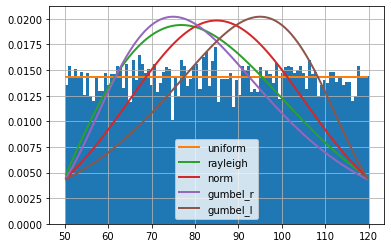

In [17]:
from fitter import Fitter
speed_blackbox = blackbox['Speed of the ball (km/hr)'].values
f_blackbox = Fitter(speed_blackbox)
f_blackbox.fit()
f_blackbox.summary()

In [18]:
f_blackbox.get_best(method='sumsquare_error')

{'uniform': {'loc': 50.00158439605523, 'scale': 69.99588028284526}}

In [19]:
f_blackbox.fitted_param['uniform']

(50.00158439605523, 69.99588028284526)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  retu

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
uniform,0.000199,853.670382,-177313.407802,0.004827
rayleigh,0.002521,884.107966,-151915.316315,0.073497
norm,0.002790,888.973257,-150901.187047,0.081916
gumbel_l,0.003090,895.144785,-149882.123206,0.091605
gumbel_r,0.003106,895.135309,-149827.943923,0.092462


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


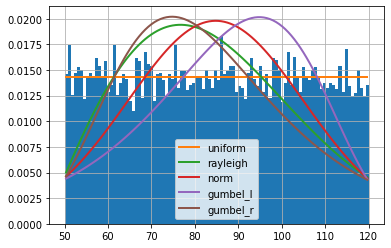

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


In [13]:
from fitter import Fitter
speed_whitebox = whitebox['Speed of the ball (km/hr)'].values
f = Fitter(speed_whitebox)
f.fit()
f.summary()

In [20]:
f.get_best(method='sumsquare_error')

{'uniform': {'loc': 50.00798146790225, 'scale': 69.98996742861766}}

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is d

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
uniform,0.000597,741.757298,-166314.871432,0.004812
rayleigh,0.007885,772.196165,-140512.574725,0.074872
norm,0.008834,777.058048,-139376.179801,0.084576
gumbel_r,0.009627,783.226037,-138516.441174,0.093453
gumbel_l,0.009925,783.220283,-138211.665099,0.095916


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


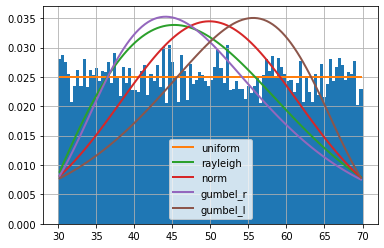

In [21]:
theta_blackbox = blackbox['Angle of the ball with z axis (deg)']
f = Fitter(theta_blackbox)
f.fit()
f.summary()

In [23]:
f.get_best(method='sumsquare_error')

{'uniform': {'loc': 30.00249376824524, 'scale': 39.9939214161531}}

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determi

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
uniform,0.000582,741.745496,-166580.939376,0.004573
rayleigh,0.007903,772.173718,-140490.531169,0.074610
norm,0.008719,777.040049,-139507.706791,0.083284
gumbel_l,0.009641,783.207252,-138502.571439,0.093392
gumbel_r,0.009666,783.204090,-138476.657099,0.093323


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


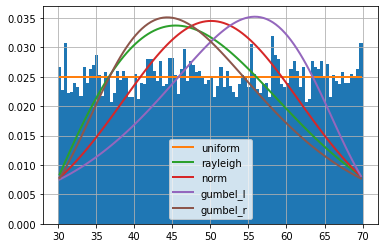

In [26]:
theta_whitebox = whitebox['Angle of the ball with z axis (deg)']
f_w = Fitter(theta_whitebox)
f_w.fit()
f_w.summary()

In [27]:
f_w.get_best(method='sumsquare_error')

{'uniform': {'loc': 30.00249376824524, 'scale': 39.9939214161531}}

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determi

,sumsquare_error,aic,bic,kl_div
rayleigh,0.001082,968.219988,-160378.435597,0.050040
gumbel_r,0.001208,978.517210,-159272.025452,0.059115
norm,0.001618,975.850463,-156347.981028,0.075108
logistic,0.001790,985.222827,-155340.313872,0.085575
uniform,0.001826,925.139681,-155141.750784,0.124688


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = i

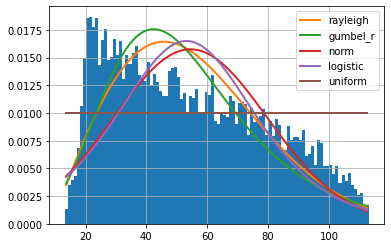

In [28]:
range_blackbox = blackbox['Range of the ball (m)']
f_range_b = Fitter(range_blackbox)
f_range_b.fit()
f_range_b.summary()

In [29]:
f_range_b.get_best(method='sumsquare_error')

{'rayleigh': {'loc': 8.824082026738711, 'scale': 36.905476198043054}}

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ

,sumsquare_error,aic,bic,kl_div
rayleigh,0.001168,968.099125,-159608.523050,0.053552
gumbel_r,0.001286,978.578159,-158650.938465,0.062622
norm,0.001707,975.794258,-155816.738033,0.078255
uniform,0.001838,925.053342,-155074.530973,0.126762
logistic,0.001875,985.276999,-154874.413239,0.088806


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = i

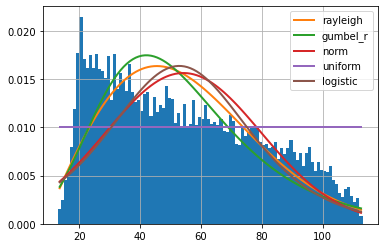

In [30]:
range_whitebox = whitebox['Range of the ball (m)']
f_range_w = Fitter(range_whitebox)
f_range_w.fit()
f_range_w.summary()

In [31]:
f_range_w.get_best(method='sumsquare_error')

{'rayleigh': {'loc': 8.455297127439954, 'scale': 37.03866246384576}}

In [ ]:
fielder_r_t1_b = blackbox['fielder_1_r_t1 (m)']
f_t1_b = Fitter(fielder_r_t1_b)
f_t1_b.fit()
f_t1_b.summary()

# STATISTICAL ANALYSIS

In [6]:
from statsmodels.stats.weightstats import ztest

data_black = df_exp1_black.copy()
data_white = df_exp1_white.copy()
zstat,p_value = ztest(data_white,data_black)
p_value

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:746: RuntimeWarning: invalid value encountered in true_divide
  zstat = (value1 - value2 - diff) / std_diff


array([6.74579705e-001, 6.05398090e-001, 4.52972140e-001, 6.52562360e-001,
                   nan,             nan, 3.01740207e-001, 3.90900294e-001,
       3.02379200e-001, 3.97188495e-001,             nan,             nan,
       6.93690365e-001, 2.67925636e-001, 6.79684859e-001, 2.86584112e-001,
                   nan,             nan, 0.00000000e+000, 8.55122440e-001,
       0.00000000e+000, 8.63161103e-001,             nan,             nan,
       8.44654242e-002, 2.84110117e-001, 1.65652917e-001, 2.74155111e-001,
                   nan,             nan, 2.57080075e-105, 7.23731473e-001,
       3.91012922e-079, 6.91760413e-001,             nan,             nan,
       0.00000000e+000, 8.64088529e-001, 0.00000000e+000, 8.54034827e-001,
                   nan,             nan, 2.91408553e-007, 2.12646645e-001,
       1.08361207e-005, 2.16043813e-001,             nan,             nan,
       0.00000000e+000, 6.19801583e-001, 0.00000000e+000, 6.28569056e-001,
                   nan, 1

In [7]:
for i in range(len(p_value)):
    if(p_value[i]<0.05 and p_value[i] is not None):
        print(data_black.columns[i])
        

fielder_3_r_t1 (m)
fielder_3_r_t2 (m)
fielder_5_r_t1 (m)
fielder_5_r_t2 (m)
fielder_6_r_t1 (m)
fielder_6_r_t2 (m)
fielder_7_r_t1 (m)
fielder_7_r_t2 (m)
fielder_8_r_t1 (m)
fielder_8_r_t2 (m)
fielder_9_r_t1 (m)
fielder_9_r_t2 (m)
fielder_10_r_t1 (m)
fielder_10_r_t2 (m)
fielder_11_r_t1 (m)
fielder_11_r_t2 (m)
Reaction time (s)
Probablity


In [8]:
# t-test
from statsmodels.stats.weightstats import ttest_ind

tstat,pvalue_tt,degf = ttest_ind(data_black,data_white)
pvalue_tt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:650: RuntimeWarning: invalid value encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


array([6.74584216e-001, 6.05403803e-001, 4.52980970e-001, 6.52567240e-001,
                   nan,             nan, 3.01752696e-001, 3.90910577e-001,
       3.02391673e-001, 3.97198627e-001,             nan,             nan,
       6.93694564e-001, 2.67938960e-001, 6.79689285e-001, 2.86596978e-001,
                   nan,             nan, 0.00000000e+000, 8.55124290e-001,
       0.00000000e+000, 8.63162848e-001,             nan,             nan,
       8.44808731e-002, 2.84123044e-001, 1.65668372e-001, 2.74168283e-001,
                   nan,             nan, 4.18070115e-104, 7.23735199e-001,
       1.86764629e-078, 6.91764643e-001,             nan,             nan,
       0.00000000e+000, 8.64090261e-001, 0.00000000e+000, 8.54036692e-001,
                   nan,             nan, 2.94128637e-007, 2.12661244e-001,
       1.08921427e-005, 2.16058340e-001,             nan,             nan,
       0.00000000e+000, 6.19807036e-001, 0.00000000e+000, 6.28574353e-001,
                   nan, 1

In [9]:
for i in range(len(pvalue_tt)):
    if(pvalue_tt[i]<0.05 and pvalue_tt[i] is not None):
        print(data_black.columns[i])

fielder_3_r_t1 (m)
fielder_3_r_t2 (m)
fielder_5_r_t1 (m)
fielder_5_r_t2 (m)
fielder_6_r_t1 (m)
fielder_6_r_t2 (m)
fielder_7_r_t1 (m)
fielder_7_r_t2 (m)
fielder_8_r_t1 (m)
fielder_8_r_t2 (m)
fielder_9_r_t1 (m)
fielder_9_r_t2 (m)
fielder_10_r_t1 (m)
fielder_10_r_t2 (m)
fielder_11_r_t1 (m)
fielder_11_r_t2 (m)
Reaction time (s)
Probablity


In [10]:
from scipy.stats import f_oneway

fstat,pvalue_f = f_oneway(data_black,data_white)
pvalue_f

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


array([6.74584216e-001, 6.05403803e-001, 4.52980970e-001, 6.52567240e-001,
                   nan,             nan, 3.01752696e-001, 3.90910577e-001,
       3.02391673e-001, 3.97198627e-001,             nan,             nan,
       6.93694564e-001, 2.67938960e-001, 6.79689285e-001, 2.86596978e-001,
                   nan,             nan, 0.00000000e+000, 8.55124290e-001,
       0.00000000e+000, 8.63162848e-001,             nan,             nan,
       8.44808731e-002, 2.84123044e-001, 1.65668372e-001, 2.74168283e-001,
                   nan,             nan, 4.18070115e-104, 7.23735199e-001,
       1.86764629e-078, 6.91764643e-001,             nan,             nan,
       0.00000000e+000, 8.64090261e-001, 0.00000000e+000, 8.54036692e-001,
                   nan,             nan, 2.94128637e-007, 2.12661244e-001,
       1.08921427e-005, 2.16058340e-001,             nan,             nan,
       0.00000000e+000, 6.19807036e-001, 0.00000000e+000, 6.28574353e-001,
                   nan,  

In [11]:
for i in range(len(pvalue_f)):
    if(pvalue_f[i]<0.05 and pvalue_f[i] is not None):
        print(data_black.columns[i])

fielder_3_r_t1 (m)
fielder_3_r_t2 (m)
fielder_5_r_t1 (m)
fielder_5_r_t2 (m)
fielder_6_r_t1 (m)
fielder_6_r_t2 (m)
fielder_7_r_t1 (m)
fielder_7_r_t2 (m)
fielder_8_r_t1 (m)
fielder_8_r_t2 (m)
fielder_9_r_t1 (m)
fielder_9_r_t2 (m)
fielder_10_r_t1 (m)
fielder_10_r_t2 (m)
fielder_11_r_t1 (m)
fielder_11_r_t2 (m)
Reaction time (s)
Probablity


In [12]:
from scipy.stats import ks_2samp
pvalue_ks = []
col = len(data_black.columns)
for i in range(col):
    data_1 = data_black.iloc[:,i]
    data_2 = data_white.iloc[:,i]
    ks_stat,p_value_ks = ks_2samp(data_1,data_2)
    pvalue_ks.append(p_value_ks)
pvalue_ks

[0.9711713729518725,
 0.46757740082070737,
 0.9139260465470475,
 0.5689366476865705,
 1.0,
 1.0,
 0.43585275359069964,
 0.9471107086522933,
 0.43585275359069964,
 0.9711713729518725,
 1.0,
 1.0,
 0.7689615674766569,
 0.5342696653345376,
 0.7689615674766569,
 0.5116055794163079,
 1.0,
 1.0,
 0.0,
 4.397776837181771e-12,
 0.0,
 2.2295867693128428e-13,
 1.0,
 1.0,
 2.7606663093755426e-171,
 3.3689631596405904e-26,
 5.6988060106341105e-148,
 2.09020979905735e-34,
 1.0,
 1.0,
 0.0,
 5.009617711611607e-205,
 0.0,
 6.499305443751384e-268,
 1.0,
 1.0,
 0.0,
 2.1485655004645875e-14,
 0.0,
 3.0301698817137215e-15,
 1.0,
 1.0,
 1.049470144e-315,
 8.064893112148982e-55,
 2.5039574007712966e-270,
 2.5118538439819575e-70,
 1.0,
 1.0,
 0.0,
 3.736380147435433e-45,
 0.0,
 3.793908925840325e-50,
 1.0,
 1.0,
 1e-323,
 8.064893112148982e-55,
 1e-323,
 5.263933340818291e-69,
 1.0,
 1.0,
 0.0,
 3.15140197380837e-24,
 0.0,
 9.872569065798303e-26,
 1.0,
 1.0,
 0.0,
 1.1617373357419915e-21,
 0.0,
 2.129097171

In [13]:
for i in range(len(pvalue_ks)):
    if(pvalue_ks[i]<0.05):
        print(data_black.columns[i])

fielder_3_r_t1 (m)
fielder_3_phi_t1 (deg)
fielder_3_r_t2 (m)
fielder_3_phi_t2 (deg)
fielder_4_r_t1 (m)
fielder_4_phi_t1 (deg)
fielder_4_r_t2 (m)
fielder_4_phi_t2 (deg)
fielder_5_r_t1 (m)
fielder_5_phi_t1 (deg)
fielder_5_r_t2 (m)
fielder_5_phi_t2 (deg)
fielder_6_r_t1 (m)
fielder_6_phi_t1 (deg)
fielder_6_r_t2 (m)
fielder_6_phi_t2 (deg)
fielder_7_r_t1 (m)
fielder_7_phi_t1 (deg)
fielder_7_r_t2 (m)
fielder_7_phi_t2 (deg)
fielder_8_r_t1 (m)
fielder_8_phi_t1 (deg)
fielder_8_r_t2 (m)
fielder_8_phi_t2 (deg)
fielder_9_r_t1 (m)
fielder_9_phi_t1 (deg)
fielder_9_r_t2 (m)
fielder_9_phi_t2 (deg)
fielder_10_r_t1 (m)
fielder_10_phi_t1 (deg)
fielder_10_r_t2 (m)
fielder_10_phi_t2 (deg)
fielder_11_r_t1 (m)
fielder_11_phi_t1 (deg)
fielder_11_r_t2 (m)
fielder_11_phi_t2 (deg)
Reaction time (s)
Probablity


In [14]:
# correlation tests
# pearson r
data_black.corr()

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),fielder_1_r_t2 (m),fielder_1_phi_t2 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
Speed of the ball (km/hr),1.000000,0.011480,0.964047,-0.008529,NaN,NaN,0.373650,-0.002512,0.374135,-0.002177,...,0.577120,0.002359,NaN,NaN,0.582549,0.007122,0.585178,0.007095,0.016137,-0.151368
Angle of the ball with z axis (deg),0.011480,1.000000,-0.143939,-0.015853,NaN,NaN,-0.053401,-0.018722,-0.054124,-0.018867,...,-0.094350,-0.007098,NaN,NaN,-0.094804,-0.002447,-0.094917,-0.002355,-0.013663,-0.270162
Range of the ball (m),0.964047,-0.143939,1.000000,-0.007879,NaN,NaN,0.365735,-0.001416,0.365842,-0.001063,...,0.628823,0.009815,NaN,NaN,0.636012,0.013024,0.638342,0.012986,0.019025,-0.125341
Angle of the ball with x axis (deg),-0.008529,-0.015853,-0.007879,1.000000,NaN,NaN,-0.004643,0.862658,-0.004601,0.860243,...,0.314195,0.082805,NaN,NaN,0.120265,-0.431723,0.119488,-0.434086,-0.015022,-0.247306
fielder_1_r (m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fielder_11_phi_t1 (deg),0.007122,-0.002447,0.013024,-0.431723,NaN,NaN,0.614309,-0.511530,0.608150,-0.506906,...,-0.264614,0.582200,NaN,NaN,0.006761,1.000000,0.006574,0.999940,0.001177,0.157530
fielder_11_r_t2 (m),0.585178,-0.094917,0.638342,0.119488,NaN,NaN,0.480668,0.215523,0.478534,0.214031,...,0.680263,0.282129,NaN,NaN,0.999949,0.006574,1.000000,0.006179,0.008984,-0.036489
fielder_11_phi_t2 (deg),0.007095,-0.002355,0.012986,-0.434086,NaN,NaN,0.615945,-0.514215,0.609948,-0.509578,...,-0.264378,0.584094,NaN,NaN,0.006358,0.999940,0.006179,1.000000,0.001109,0.158346
Reaction time (s),0.016137,-0.013663,0.019025,-0.015022,NaN,NaN,-0.000025,-0.011133,0.000358,-0.011206,...,0.008346,-0.006536,NaN,NaN,0.008955,0.001177,0.008984,0.001109,1.000000,-0.034658


In [15]:
data_white.corr()

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),fielder_1_r_t2 (m),fielder_1_phi_t2 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
Speed of the ball (km/hr),1.000000,0.001455,0.965094,-0.013369,NaN,NaN,0.367603,-0.012542,0.367780,-0.012527,...,0.589894,-0.015790,NaN,NaN,0.586312,0.008857,0.587775,0.008785,NaN,-0.196173
Angle of the ball with z axis (deg),0.001455,1.000000,-0.147781,-0.010436,NaN,NaN,-0.046831,-0.007850,-0.047480,-0.007746,...,-0.101448,0.007300,NaN,NaN,-0.100375,0.007540,-0.100427,0.007561,NaN,-0.267303
Range of the ball (m),0.965094,-0.147781,1.000000,-0.011906,NaN,NaN,0.352346,-0.010623,0.352111,-0.010679,...,0.640057,-0.018998,NaN,NaN,0.639062,0.006820,0.640301,0.006707,NaN,-0.161388
Angle of the ball with x axis (deg),-0.013369,-0.010436,-0.011906,1.000000,NaN,NaN,0.005536,0.864284,0.004970,0.862061,...,0.314847,0.077175,NaN,NaN,0.107594,-0.425124,0.106995,-0.426846,NaN,0.011983
fielder_1_r (m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fielder_11_phi_t1 (deg),0.008857,0.007540,0.006820,-0.425124,NaN,NaN,0.621022,-0.503091,0.615121,-0.498448,...,-0.278636,0.604080,NaN,NaN,0.014523,1.000000,0.014422,0.999967,NaN,0.015204
fielder_11_r_t2 (m),0.587775,-0.100427,0.640301,0.106995,NaN,NaN,0.483453,0.210971,0.480702,0.209257,...,0.686174,0.255069,NaN,NaN,0.999985,0.014422,1.000000,0.014049,NaN,-0.026986
fielder_11_phi_t2 (deg),0.008785,0.007561,0.006707,-0.426846,NaN,NaN,0.622164,-0.505045,0.616388,-0.500391,...,-0.278631,0.605336,NaN,NaN,0.014147,0.999967,0.014049,1.000000,NaN,0.015657
Reaction time (s),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
num_to_code_dict = {}
for key in range(data_black.shape[1]):
    num_to_code_dict[key] = data_black.columns[key]
def num_to_code(num):
    return num_to_code_dict[num]
def find_corr(matrix,corr_percent):
    label=0
    for i in range(len(matrix)):
        for j in range(i+1,len(matrix.columns)):
            if abs(matrix.iloc[i,j])>=corr_percent:
                print('correlation exists between ',num_to_code(i),'and ',num_to_code(j))
                label=1
    if label==0:
        print('No correlations exist')

In [17]:
find_corr(data_black.corr(),0.9)

correlation exists between  Speed of the ball (km/hr) and  Range of the ball (m)
correlation exists between  fielder_1_r_t1 (m) and  fielder_1_r_t2 (m)
correlation exists between  fielder_1_r_t1 (m) and  fielder_4_r_t2 (m)
correlation exists between  fielder_1_phi_t1 (deg) and  fielder_1_phi_t2 (deg)
correlation exists between  fielder_1_phi_t1 (deg) and  fielder_2_phi_t1 (deg)
correlation exists between  fielder_1_phi_t1 (deg) and  fielder_2_phi_t2 (deg)
correlation exists between  fielder_1_r_t2 (m) and  fielder_4_r_t2 (m)
correlation exists between  fielder_1_phi_t2 (deg) and  fielder_2_phi_t2 (deg)
correlation exists between  fielder_2_r_t1 (m) and  fielder_2_r_t2 (m)
correlation exists between  fielder_2_r_t1 (m) and  fielder_7_r_t2 (m)
correlation exists between  fielder_2_phi_t1 (deg) and  fielder_2_phi_t2 (deg)
correlation exists between  fielder_2_r_t2 (m) and  fielder_7_r_t2 (m)
correlation exists between  fielder_3_r_t1 (m) and  fielder_3_r_t2 (m)
correlation exists between 

In [21]:
find_corr(data_white.corr(),0.9)

correlation exists between  Speed of the ball (km/hr) and  Range of the ball (m)
correlation exists between  fielder_1_r_t1 (m) and  fielder_1_r_t2 (m)
correlation exists between  fielder_1_r_t1 (m) and  fielder_4_r_t1 (m)
correlation exists between  fielder_1_r_t1 (m) and  fielder_4_r_t2 (m)
correlation exists between  fielder_1_phi_t1 (deg) and  fielder_1_phi_t2 (deg)
correlation exists between  fielder_1_phi_t1 (deg) and  fielder_2_phi_t2 (deg)
correlation exists between  fielder_1_r_t2 (m) and  fielder_4_r_t2 (m)
correlation exists between  fielder_1_phi_t2 (deg) and  fielder_2_phi_t2 (deg)
correlation exists between  fielder_2_r_t1 (m) and  fielder_2_r_t2 (m)
correlation exists between  fielder_2_r_t1 (m) and  fielder_7_r_t2 (m)
correlation exists between  fielder_2_phi_t1 (deg) and  fielder_2_phi_t2 (deg)
correlation exists between  fielder_2_r_t2 (m) and  fielder_7_r_t2 (m)
correlation exists between  fielder_3_r_t1 (m) and  fielder_3_r_t2 (m)
correlation exists between  fielder

In [ ]:
def mic_corr(df):
    from minepy import MINE
    from sklearn import preprocessing
    mine = MINE(alpha=0.6,c=15)
    scores=[[]]*(df.shape[1])
    for i in range(df.shape[1]):
        dummy_list=[]
        for j in range(df.shape[1]):
            X = df.iloc[:,i]
            Y = df.iloc[:,j]
            mine.compute_score(X,Y)
            corr = float(mine.mic())
            dummy_list.append(corr)
        scores[i]=dummy_list
    
    df_corr_dict={}
    for g in range(df.shape[1]):
        key = df.columns[g]
        df_corr_dict[key] = scores[g]
        

    df_corr = pd.DataFrame(df_corr_dict,index = df.columns)
    return df_corr

In [28]:
mic_corr(data_black.iloc[0:1000,:])

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),fielder_1_r_t2 (m),fielder_1_phi_t2 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
Speed of the ball (km/hr),1.000000,0.137794,0.945711,0.135475,0.0,0.0,0.248130,0.132604,0.248130,0.123037,...,0.446203,0.453554,0.0,0.0,0.459865,0.447753,0.459865,0.447753,0.124351,0.262374
Angle of the ball with z axis (deg),0.137794,1.000000,0.147186,0.133936,0.0,0.0,0.134853,0.129586,0.134853,0.133551,...,0.135115,0.137716,0.0,0.0,0.137342,0.155084,0.137342,0.155084,0.134491,0.170367
Range of the ball (m),0.945711,0.147186,1.000000,0.131287,0.0,0.0,0.278814,0.129524,0.278814,0.125686,...,0.462487,0.467117,0.0,0.0,0.482869,0.474635,0.482869,0.474635,0.123505,0.269236
Angle of the ball with x axis (deg),0.135475,0.133936,0.131287,1.000000,0.0,0.0,0.636581,1.000000,0.636581,1.000000,...,0.440331,0.997245,0.0,0.0,0.404364,1.000000,0.404364,1.000000,0.127523,0.326554
fielder_1_r (m),0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fielder_11_phi_t1 (deg),0.447753,0.155084,0.474635,1.000000,0.0,0.0,0.553175,0.538799,0.553175,0.514195,...,0.342952,0.448406,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.124751,0.309538
fielder_11_r_t2 (m),0.459865,0.137342,0.482869,0.404364,0.0,0.0,0.362856,0.288921,0.362856,0.223531,...,0.301644,0.368537,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.136074,0.193507
fielder_11_phi_t2 (deg),0.447753,0.155084,0.474635,1.000000,0.0,0.0,0.553175,0.538799,0.553175,0.514195,...,0.342952,0.448406,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.124751,0.309538
Reaction time (s),0.124351,0.134491,0.123505,0.127523,0.0,0.0,0.144358,0.120273,0.144358,0.124726,...,0.139234,0.142266,0.0,0.0,0.136074,0.124751,0.136074,0.124751,1.000000,0.118276


In [29]:
find_corr(mic_corr(data_black.iloc[0:1000,:]),0.3)

correlation exists between  Speed of the ball (km/hr) and  Range of the ball (m)
correlation exists between  Speed of the ball (km/hr) and  fielder_3_r_t1 (m)
correlation exists between  Speed of the ball (km/hr) and  fielder_3_phi_t1 (deg)
correlation exists between  Speed of the ball (km/hr) and  fielder_3_r_t2 (m)
correlation exists between  Speed of the ball (km/hr) and  fielder_3_phi_t2 (deg)
correlation exists between  Speed of the ball (km/hr) and  fielder_4_r_t1 (m)
correlation exists between  Speed of the ball (km/hr) and  fielder_4_r_t2 (m)
correlation exists between  Speed of the ball (km/hr) and  fielder_5_r_t1 (m)
correlation exists between  Speed of the ball (km/hr) and  fielder_5_r_t2 (m)
correlation exists between  Speed of the ball (km/hr) and  fielder_6_r_t1 (m)
correlation exists between  Speed of the ball (km/hr) and  fielder_6_phi_t1 (deg)
correlation exists between  Speed of the ball (km/hr) and  fielder_6_r_t2 (m)
correlation exists between  Speed of the ball (km

correlation exists between  fielder_4_phi_t1 (deg) and  fielder_10_phi_t1 (deg)
correlation exists between  fielder_4_phi_t1 (deg) and  fielder_10_phi_t2 (deg)
correlation exists between  fielder_4_phi_t1 (deg) and  fielder_11_r_t1 (m)
correlation exists between  fielder_4_phi_t1 (deg) and  fielder_11_phi_t1 (deg)
correlation exists between  fielder_4_phi_t1 (deg) and  fielder_11_r_t2 (m)
correlation exists between  fielder_4_phi_t1 (deg) and  fielder_11_phi_t2 (deg)
correlation exists between  fielder_4_phi_t1 (deg) and  Probablity
correlation exists between  fielder_4_r_t2 (m) and  fielder_4_phi_t2 (deg)
correlation exists between  fielder_4_r_t2 (m) and  fielder_5_r_t1 (m)
correlation exists between  fielder_4_r_t2 (m) and  fielder_5_phi_t1 (deg)
correlation exists between  fielder_4_r_t2 (m) and  fielder_5_r_t2 (m)
correlation exists between  fielder_4_r_t2 (m) and  fielder_5_phi_t2 (deg)
correlation exists between  fielder_4_r_t2 (m) and  fielder_6_phi_t1 (deg)
correlation exists 

correlation exists between  fielder_7_phi_t2 (deg) and  fielder_9_phi_t2 (deg)
correlation exists between  fielder_7_phi_t2 (deg) and  fielder_10_r_t1 (m)
correlation exists between  fielder_7_phi_t2 (deg) and  fielder_10_phi_t1 (deg)
correlation exists between  fielder_7_phi_t2 (deg) and  fielder_10_r_t2 (m)
correlation exists between  fielder_7_phi_t2 (deg) and  fielder_10_phi_t2 (deg)
correlation exists between  fielder_7_phi_t2 (deg) and  fielder_11_phi_t1 (deg)
correlation exists between  fielder_7_phi_t2 (deg) and  fielder_11_phi_t2 (deg)
correlation exists between  fielder_8_r_t1 (m) and  fielder_8_phi_t1 (deg)
correlation exists between  fielder_8_r_t1 (m) and  fielder_8_r_t2 (m)
correlation exists between  fielder_8_r_t1 (m) and  fielder_8_phi_t2 (deg)
correlation exists between  fielder_8_r_t1 (m) and  fielder_9_r_t1 (m)
correlation exists between  fielder_8_r_t1 (m) and  fielder_9_phi_t1 (deg)
correlation exists between  fielder_8_r_t1 (m) and  fielder_9_r_t2 (m)
correlation

In [24]:
mic_corr(data_black.iloc[:,[0,1,2,3,-1,-2]])

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),Probablity,Reaction time (s)
Speed of the ball (km/hr),1.000000,0.061958,0.885566,0.063915,0.249681,0.066211
Angle of the ball with z axis (deg),0.061958,1.000000,0.092661,0.062311,0.130994,0.063156
Range of the ball (m),0.885566,0.092661,1.000000,0.064457,0.243739,0.064520
Angle of the ball with x axis (deg),0.063915,0.062311,0.064457,1.000000,0.307550,0.061048
Probablity,0.249681,0.130994,0.243739,0.307550,0.912870,0.059049
Reaction time (s),0.066211,0.063156,0.064520,0.061048,0.059049,1.000000


In [27]:
mic_corr(data_white.iloc[:,[0,1,2,3,-1,-2]])

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),Probablity,Reaction time (s)
Speed of the ball (km/hr),1.000000,0.059447,0.890193,0.061587,0.221081,0.0
Angle of the ball with z axis (deg),0.059447,1.000000,0.095910,0.061563,0.115475,0.0
Range of the ball (m),0.890193,0.095910,1.000000,0.060492,0.263858,0.0
Angle of the ball with x axis (deg),0.061587,0.061563,0.060492,1.000000,0.166740,0.0
Probablity,0.221081,0.115475,0.263858,0.166740,0.926152,0.0
Reaction time (s),0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## WORKING WITH CONFIG FILE

In [203]:
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2*pi/180-phi1*pi/180))

for i in range(len(config_file)):
    list_total = [[]]*(config_file.iloc[i,2]+1)
    value = [None]*config_file.iloc[i,2]
    list_final = list_total[config_file.iloc[i,2]]
    for n in range(config_file.iloc[i,2]):
        list_total[n] = output_dict_black[config_file.iloc[i,3+n]]
    for j in range(number_of_training_data):
        for k in range(len(value)):
            value[k] = list_total[k][j]
        list_final.append(eval(config_file.iloc[i,-1]))
    output_dict_black[config_file.iloc[i,0]] = list_final    
    output_dict_config_black[config_file.iloc[i,0]] = list_final
    

In [178]:
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2*pi/180-phi1*pi/180))

for i in range(len(config_file)):
    list_total = [[]]*(config_file.iloc[i,2]+1)
    value = [None]*config_file.iloc[i,2]
    list_final = list_total[config_file.iloc[i,2]]
    for n in range(config_file.iloc[i,2]):
        list_total[n] = output_dict_white[config_file.iloc[i,3+n]]
    for j in range(number_of_training_data):
        for k in range(len(value)):
            value[k] = list_total[k][j]
        list_final.append(eval(config_file.iloc[i,-1]))
    output_dict_white[config_file.iloc[i,0]] = list_final    
    output_dict_config_white[config_file.iloc[i,0]] = list_final
    

## EXPERIMENT 1

### LOADING BLACKBOX AND WHITEBOX DATA

In [20]:
# generating dictionary file consisting blackbox data

pi=math.pi

# number of training datas to be generated
number_of_training_data = 10000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 40
    higher_speed = 100
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,time):
    distance = speed*time*5/18
    theta = math.atan2((r2*math.sin(phi2)-r1*math.sin(phi1)),(r2*math.cos(phi2)-r1*math.cos(phi1)))
    theta = (theta+2*pi)%(2*pi)
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = math.atan2(y,x)
    phi = (phi+2*pi)%(2*pi)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (75,3*pi/2) #sweeper cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 20
speed_of_fielder[1] = 20
speed_of_fielder[2] = 25
speed_of_fielder[3] = 19
speed_of_fielder[4] = 29
speed_of_fielder[5] = 16
speed_of_fielder[6] = 22
speed_of_fielder[7] = 30
speed_of_fielder[8] = 18
speed_of_fielder[9] = 15
speed_of_fielder[10] = 26

# reaction time of each fielder
reaction_time = [None]*11

# sure-handedness of each fielder
sure_handedness = [None]*11

sure_handedness[0] = random.uniform(0,1)
sure_handedness[1] = random.uniform(0,1)
sure_handedness[2] = random.uniform(0,1)
sure_handedness[3] = random.uniform(0,1)
sure_handedness[4] = random.uniform(0,1)
sure_handedness[5] = random.uniform(0,1)
sure_handedness[6] = random.uniform(0,1)
sure_handedness[7] = random.uniform(0,1)
sure_handedness[8] = random.uniform(0,1)
sure_handedness[9] = random.uniform(0,1)
sure_handedness[10] = random.uniform(0,1)

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
time_taken_ball=[]
time_taken_fielder=[]
output=[]
reaction=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t1=[]
fielder_1_phi_t1=[]
fielder_1_r_t2=[]
fielder_1_phi_t2=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t1=[]
fielder_2_phi_t1=[]
fielder_2_r_t2=[]
fielder_2_phi_t2=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t1=[]
fielder_3_phi_t1=[]
fielder_3_r_t2=[]
fielder_3_phi_t2=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t1=[]
fielder_4_phi_t1=[]
fielder_4_r_t2=[]
fielder_4_phi_t2=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t1=[]
fielder_5_phi_t1=[]
fielder_5_r_t2=[]
fielder_5_phi_t2=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t1=[]
fielder_6_phi_t1=[]
fielder_6_r_t2=[]
fielder_6_phi_t2=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t1=[]
fielder_7_phi_t1=[]
fielder_7_r_t2=[]
fielder_7_phi_t2=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t1=[]
fielder_8_phi_t1=[]
fielder_8_r_t2=[]
fielder_8_phi_t2=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t1=[]
fielder_9_phi_t1=[]
fielder_9_r_t2=[]
fielder_9_phi_t2=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t1=[]
fielder_10_phi_t1=[]
fielder_10_r_t2=[]
fielder_10_phi_t2=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t1=[]
fielder_11_phi_t1=[]
fielder_11_r_t2=[]
fielder_11_phi_t2=[]


for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    reaction_time[0] = random.uniform(0.1,0.5)
    reaction_time[1] = random.uniform(0.1,0.5)
    reaction_time[2] = random.uniform(0.1,0.5)
    reaction_time[3] = random.uniform(0.1,0.5)
    reaction_time[4] = random.uniform(0.1,0.5)
    reaction_time[5] = random.uniform(0.1,0.5)
    reaction_time[6] = random.uniform(0.1,0.5)
    reaction_time[7] = random.uniform(0.1,0.5)
    reaction_time[8] = random.uniform(0.1,0.5)
    reaction_time[9] = random.uniform(0.1,0.5)
    reaction_time[10] = random.uniform(0.1,0.5)
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_time = (dist(range_ball,phi,field_posn[0][0],field_posn[0][1])/(speed_of_fielder[0]*5/18))+reaction_time[0]
        min_index = 0
        min_index_2 = 0
        for i in range(1,11):
            new_time = (dist(range_ball,phi,field_posn[i][0],field_posn[i][1])/(speed_of_fielder[i]*5/18))+reaction_time[i]
            if new_time<min_time:
                min_time = new_time
                min_index = i
                min_index_2 = i
      
    
        if min_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t1=[]
    field_posn_after_t2=[]
    for i in range(0,11):
        field_posn_after_t1.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],0.5))
        field_posn_after_t2.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],1))
    
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1]*180/pi)
    fielder_1_r_t1.append(field_posn_after_t1[0][0])
    fielder_1_phi_t1.append(field_posn_after_t1[0][1]*180/pi)
    fielder_1_r_t2.append(field_posn_after_t2[0][0])
    fielder_1_phi_t2.append(field_posn_after_t2[0][1]*180/pi)
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1]*180/pi)
    fielder_2_r_t1.append(field_posn_after_t1[1][0])
    fielder_2_phi_t1.append(field_posn_after_t1[1][1]*180/pi)
    fielder_2_r_t2.append(field_posn_after_t2[1][0])
    fielder_2_phi_t2.append(field_posn_after_t2[1][1]*180/pi)
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1]*180/pi)
    fielder_3_r_t1.append(field_posn_after_t1[2][0])
    fielder_3_phi_t1.append(field_posn_after_t1[2][1]*180/pi)
    fielder_3_r_t2.append(field_posn_after_t2[2][0])
    fielder_3_phi_t2.append(field_posn_after_t2[2][1]*180/pi)
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1]*180/pi)
    fielder_4_r_t1.append(field_posn_after_t1[3][0])
    fielder_4_phi_t1.append(field_posn_after_t1[3][1]*180/pi)
    fielder_4_r_t2.append(field_posn_after_t2[3][0])
    fielder_4_phi_t2.append(field_posn_after_t2[3][1]*180/pi)
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1]*180/pi)
    fielder_5_r_t1.append(field_posn_after_t1[4][0])
    fielder_5_phi_t1.append(field_posn_after_t1[4][1]*180/pi)
    fielder_5_r_t2.append(field_posn_after_t2[4][0])
    fielder_5_phi_t2.append(field_posn_after_t2[4][1]*180/pi)
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1]*180/pi)
    fielder_6_r_t1.append(field_posn_after_t1[5][0])
    fielder_6_phi_t1.append(field_posn_after_t1[5][1]*180/pi)
    fielder_6_r_t2.append(field_posn_after_t2[5][0])
    fielder_6_phi_t2.append(field_posn_after_t2[5][1]*180/pi)
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1]*180/pi)
    fielder_7_r_t1.append(field_posn_after_t1[6][0])
    fielder_7_phi_t1.append(field_posn_after_t1[6][1]*180/pi)
    fielder_7_r_t2.append(field_posn_after_t2[6][0])
    fielder_7_phi_t2.append(field_posn_after_t2[6][1]*180/pi)
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1]*180/pi)
    fielder_8_r_t1.append(field_posn_after_t1[7][0])
    fielder_8_phi_t1.append(field_posn_after_t1[7][1]*180/pi)
    fielder_8_r_t2.append(field_posn_after_t2[7][0])
    fielder_8_phi_t2.append(field_posn_after_t2[7][1]*180/pi)
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1]*180/pi)
    fielder_9_r_t1.append(field_posn_after_t1[8][0])
    fielder_9_phi_t1.append(field_posn_after_t1[8][1]*180/pi)
    fielder_9_r_t2.append(field_posn_after_t2[8][0])
    fielder_9_phi_t2.append(field_posn_after_t2[8][1]*180/pi)
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1]*180/pi)
    fielder_10_r_t1.append(field_posn_after_t1[9][0])
    fielder_10_phi_t1.append(field_posn_after_t1[9][1]*180/pi)
    fielder_10_r_t2.append(field_posn_after_t2[9][0])
    fielder_10_phi_t2.append(field_posn_after_t2[9][1]*180/pi)
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1]*180/pi)
    fielder_11_r_t1.append(field_posn_after_t1[10][0])
    fielder_11_phi_t1.append(field_posn_after_t1[10][1]*180/pi)
    fielder_11_r_t2.append(field_posn_after_t2[10][0])
    fielder_11_phi_t2.append(field_posn_after_t2[10][1]*180/pi)
    reaction.append(reaction_time[min_index_2])
    caught_by.append(min_index)
    time_taken_ball.append(time_taken)
    time_taken_fielder.append(min_time)
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    if min_index>=0:
        output.append(sure_handedness[min_index])
    else:
        output.append(0)
    
exp_1_blackbox = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r (m)':fielder_1_r,'fielder_1_phi (deg)':fielder_1_phi,'fielder_1_r_t1 (m)':fielder_1_r_t1,'fielder_1_phi_t1 (deg)':fielder_1_phi_t1,'fielder_1_r_t2 (m)':fielder_1_r_t2,'fielder_1_phi_t2 (deg)':fielder_1_phi_t2,
               'fielder_2_r (m)':fielder_2_r,'fielder_2_phi (deg)':fielder_2_phi,'fielder_2_r_t1 (m)':fielder_2_r_t1,'fielder_2_phi_t1 (deg)':fielder_2_phi_t1,'fielder_2_r_t2 (m)':fielder_2_r_t2,'fielder_2_phi_t2 (deg)':fielder_2_phi_t2,
               'fielder_3_r (m)':fielder_3_r,'fielder_3_phi (deg)':fielder_3_phi,'fielder_3_r_t1 (m)':fielder_3_r_t1,'fielder_3_phi_t1 (deg)':fielder_3_phi_t1,'fielder_3_r_t2 (m)':fielder_3_r_t2,'fielder_3_phi_t2 (deg)':fielder_3_phi_t2,
               'fielder_4_r (m)':fielder_4_r,'fielder_4_phi (deg)':fielder_4_phi,'fielder_4_r_t1 (m)':fielder_4_r_t1,'fielder_4_phi_t1 (deg)':fielder_4_phi_t1,'fielder_4_r_t2 (m)':fielder_4_r_t2,'fielder_4_phi_t2 (deg)':fielder_4_phi_t2,
               'fielder_5_r (m)':fielder_5_r,'fielder_5_phi (deg)':fielder_5_phi,'fielder_5_r_t1 (m)':fielder_5_r_t1,'fielder_5_phi_t1 (deg)':fielder_5_phi_t1,'fielder_5_r_t2 (m)':fielder_5_r_t2,'fielder_5_phi_t2 (deg)':fielder_5_phi_t2,
               'fielder_6_r (m)':fielder_6_r,'fielder_6_phi (deg)':fielder_6_phi,'fielder_6_r_t1 (m)':fielder_6_r_t1,'fielder_6_phi_t1 (deg)':fielder_6_phi_t1,'fielder_6_r_t2 (m)':fielder_6_r_t2,'fielder_6_phi_t2 (deg)':fielder_6_phi_t2,
               'fielder_7_r (m)':fielder_7_r,'fielder_7_phi (deg)':fielder_7_phi,'fielder_7_r_t1 (m)':fielder_7_r_t1,'fielder_7_phi_t1 (deg)':fielder_7_phi_t1,'fielder_7_r_t2 (m)':fielder_7_r_t2,'fielder_7_phi_t2 (deg)':fielder_7_phi_t2,
               'fielder_8_r (m)':fielder_8_r,'fielder_8_phi (deg)':fielder_8_phi,'fielder_8_r_t1 (m)':fielder_8_r_t1,'fielder_8_phi_t1 (deg)':fielder_8_phi_t1,'fielder_8_r_t2 (m)':fielder_8_r_t2,'fielder_8_phi_t2 (deg)':fielder_8_phi_t2,
               'fielder_9_r (m)':fielder_9_r,'fielder_9_phi (deg)':fielder_9_phi,'fielder_9_r_t1 (m)':fielder_9_r_t1,'fielder_9_phi_t1 (deg)':fielder_9_phi_t1,'fielder_9_r_t2 (m)':fielder_9_r_t2,'fielder_9_phi_t2 (deg)':fielder_9_phi_t2,
               'fielder_10_r (m)':fielder_10_r,'fielder_10_phi (deg)':fielder_10_phi,'fielder_10_r_t1 (m)':fielder_10_r_t1,'fielder_10_phi_t1 (deg)':fielder_10_phi_t1,'fielder_10_r_t2 (m)':fielder_10_r_t2,'fielder_10_phi_t2 (deg)':fielder_10_phi_t2,
               'fielder_11_r (m)':fielder_11_r,'fielder_11_phi (deg)':fielder_11_phi,'fielder_11_r_t1 (m)':fielder_11_r_t1,'fielder_11_phi_t1 (deg)':fielder_11_phi_t1,'fielder_11_r_t2 (m)':fielder_11_r_t2,'fielder_11_phi_t2 (deg)':fielder_11_phi_t2,
               'Reaction time (s)':reaction,'Probablity':output}
# creating output csv file
df_exp1_black = pd.DataFrame(exp_1_blackbox)
#print(df)
#df.to_excel('E:\\statistics_experiment_blackbox.xlsx',na_rep =-1,index = False)
#print('done')

In [21]:
# generating dictionary file consisting whitebox data
import numpy
import random
import math
import pandas as pd
pi=math.pi

# number of training datas to be generated
number_of_training_data = 10000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 40
    higher_speed = 100
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,reaction_time,time):
    distance = speed*(time-reaction_time)*5/18
    theta = math.atan2((r2*math.sin(phi2)-r1*math.sin(phi1)),(r2*math.cos(phi2)-r1*math.cos(phi1)))
    theta = (theta+2*pi)%(2*pi)
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = math.atan2(y,x)
    phi = (phi+2*pi)%(2*pi)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (75,3*pi/2) #sweeper cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 20
speed_of_fielder[1] = 20
speed_of_fielder[2] = 20
speed_of_fielder[3] = 20
speed_of_fielder[4] = 20
speed_of_fielder[5] = 20
speed_of_fielder[6] = 20
speed_of_fielder[7] = 20
speed_of_fielder[8] = 20
speed_of_fielder[9] = 20
speed_of_fielder[10] = 20
# reaction time of each fielder
reaction_time = [None]*11

# sure-handedness of each fielder
sure_handedness = [None]*11

sure_handedness[0] = 1
sure_handedness[1] = 1
sure_handedness[2] = 1
sure_handedness[3] = 1
sure_handedness[4] = 1
sure_handedness[5] = 1
sure_handedness[6] = 1
sure_handedness[7] = 1
sure_handedness[8] = 1
sure_handedness[9] = 1
sure_handedness[10] = 1

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
reaction=[]
time_taken_ball=[]
time_taken_fielder=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t1=[]
fielder_1_phi_t1=[]
fielder_1_r_t2=[]
fielder_1_phi_t2=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t1=[]
fielder_2_phi_t1=[]
fielder_2_r_t2=[]
fielder_2_phi_t2=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t1=[]
fielder_3_phi_t1=[]
fielder_3_r_t2=[]
fielder_3_phi_t2=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t1=[]
fielder_4_phi_t1=[]
fielder_4_r_t2=[]
fielder_4_phi_t2=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t1=[]
fielder_5_phi_t1=[]
fielder_5_r_t2=[]
fielder_5_phi_t2=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t1=[]
fielder_6_phi_t1=[]
fielder_6_r_t2=[]
fielder_6_phi_t2=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t1=[]
fielder_7_phi_t1=[]
fielder_7_r_t2=[]
fielder_7_phi_t2=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t1=[]
fielder_8_phi_t1=[]
fielder_8_r_t2=[]
fielder_8_phi_t2=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t1=[]
fielder_9_phi_t1=[]
fielder_9_r_t2=[]
fielder_9_phi_t2=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t1=[]
fielder_10_phi_t1=[]
fielder_10_r_t2=[]
fielder_10_phi_t2=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t1=[]
fielder_11_phi_t1=[]
fielder_11_r_t2=[]
fielder_11_phi_t2=[]


for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    reaction_time[0] = 0
    reaction_time[1] = 0
    reaction_time[2] = 0
    reaction_time[3] = 0
    reaction_time[4] = 0
    reaction_time[5] = 0
    reaction_time[6] = 0
    reaction_time[7] = 0
    reaction_time[8] = 0
    reaction_time[9] = 0
    reaction_time[10] = 0

    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_time = (dist(range_ball,phi,field_posn[0][0],field_posn[0][1])/(speed_of_fielder[0]*5/18))+reaction_time[0]
        min_index = 0
        min_index_2 = 0
        for i in range(1,11):
            new_time = (dist(range_ball,phi,field_posn[i][0],field_posn[i][1])/(speed_of_fielder[i]*5/18))+reaction_time[i]
            if new_time<min_time:
                min_time = new_time
                min_index = i
                min_index_2 = i
      
    
        if min_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t1=[]
    field_posn_after_t2=[]
    for i in range(0,11):
        field_posn_after_t1.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],reaction_time[i],0.5))
        field_posn_after_t2.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],reaction_time[i],1))
    
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1]*180/pi)
    fielder_1_r_t1.append(field_posn_after_t1[0][0])
    fielder_1_phi_t1.append(field_posn_after_t1[0][1]*180/pi)
    fielder_1_r_t2.append(field_posn_after_t2[0][0])
    fielder_1_phi_t2.append(field_posn_after_t2[0][1]*180/pi)
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1]*180/pi)
    fielder_2_r_t1.append(field_posn_after_t1[1][0])
    fielder_2_phi_t1.append(field_posn_after_t1[1][1]*180/pi)
    fielder_2_r_t2.append(field_posn_after_t2[1][0])
    fielder_2_phi_t2.append(field_posn_after_t2[1][1]*180/pi)
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1]*180/pi)
    fielder_3_r_t1.append(field_posn_after_t1[2][0])
    fielder_3_phi_t1.append(field_posn_after_t1[2][1]*180/pi)
    fielder_3_r_t2.append(field_posn_after_t2[2][0])
    fielder_3_phi_t2.append(field_posn_after_t2[2][1]*180/pi)
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1]*180/pi)
    fielder_4_r_t1.append(field_posn_after_t1[3][0])
    fielder_4_phi_t1.append(field_posn_after_t1[3][1]*180/pi)
    fielder_4_r_t2.append(field_posn_after_t2[3][0])
    fielder_4_phi_t2.append(field_posn_after_t2[3][1]*180/pi)
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1]*180/pi)
    fielder_5_r_t1.append(field_posn_after_t1[4][0])
    fielder_5_phi_t1.append(field_posn_after_t1[4][1]*180/pi)
    fielder_5_r_t2.append(field_posn_after_t2[4][0])
    fielder_5_phi_t2.append(field_posn_after_t2[4][1]*180/pi)
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1]*180/pi)
    fielder_6_r_t1.append(field_posn_after_t1[5][0])
    fielder_6_phi_t1.append(field_posn_after_t1[5][1]*180/pi)
    fielder_6_r_t2.append(field_posn_after_t2[5][0])
    fielder_6_phi_t2.append(field_posn_after_t2[5][1]*180/pi)
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1]*180/pi)
    fielder_7_r_t1.append(field_posn_after_t1[6][0])
    fielder_7_phi_t1.append(field_posn_after_t1[6][1]*180/pi)
    fielder_7_r_t2.append(field_posn_after_t2[6][0])
    fielder_7_phi_t2.append(field_posn_after_t2[6][1]*180/pi)
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1]*180/pi)
    fielder_8_r_t1.append(field_posn_after_t1[7][0])
    fielder_8_phi_t1.append(field_posn_after_t1[7][1]*180/pi)
    fielder_8_r_t2.append(field_posn_after_t2[7][0])
    fielder_8_phi_t2.append(field_posn_after_t2[7][1]*180/pi)
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1]*180/pi)
    fielder_9_r_t1.append(field_posn_after_t1[8][0])
    fielder_9_phi_t1.append(field_posn_after_t1[8][1]*180/pi)
    fielder_9_r_t2.append(field_posn_after_t2[8][0])
    fielder_9_phi_t2.append(field_posn_after_t2[8][1]*180/pi)
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1]*180/pi)
    fielder_10_r_t1.append(field_posn_after_t1[9][0])
    fielder_10_phi_t1.append(field_posn_after_t1[9][1]*180/pi)
    fielder_10_r_t2.append(field_posn_after_t2[9][0])
    fielder_10_phi_t2.append(field_posn_after_t2[9][1]*180/pi)
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1]*180/pi)
    fielder_11_r_t1.append(field_posn_after_t1[10][0])
    fielder_11_phi_t1.append(field_posn_after_t1[10][1]*180/pi)
    fielder_11_r_t2.append(field_posn_after_t2[10][0])
    fielder_11_phi_t2.append(field_posn_after_t2[10][1]*180/pi)
    reaction.append(reaction_time[min_index_2])
    caught_by.append(min_index)
    time_taken_ball.append(time_taken)
    time_taken_fielder.append(min_time)
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    if min_index>=0:
        output.append(sure_handedness[min_index])
    else:
        output.append(0)
    
exp_1_whitebox = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r (m)':fielder_1_r,'fielder_1_phi (deg)':fielder_1_phi,'fielder_1_r_t1 (m)':fielder_1_r_t1,'fielder_1_phi_t1 (deg)':fielder_1_phi_t1,'fielder_1_r_t2 (m)':fielder_1_r_t2,'fielder_1_phi_t2 (deg)':fielder_1_phi_t2,
               'fielder_2_r (m)':fielder_2_r,'fielder_2_phi (deg)':fielder_2_phi,'fielder_2_r_t1 (m)':fielder_2_r_t1,'fielder_2_phi_t1 (deg)':fielder_2_phi_t1,'fielder_2_r_t2 (m)':fielder_2_r_t2,'fielder_2_phi_t2 (deg)':fielder_2_phi_t2,
               'fielder_3_r (m)':fielder_3_r,'fielder_3_phi (deg)':fielder_3_phi,'fielder_3_r_t1 (m)':fielder_3_r_t1,'fielder_3_phi_t1 (deg)':fielder_3_phi_t1,'fielder_3_r_t2 (m)':fielder_3_r_t2,'fielder_3_phi_t2 (deg)':fielder_3_phi_t2,
               'fielder_4_r (m)':fielder_4_r,'fielder_4_phi (deg)':fielder_4_phi,'fielder_4_r_t1 (m)':fielder_4_r_t1,'fielder_4_phi_t1 (deg)':fielder_4_phi_t1,'fielder_4_r_t2 (m)':fielder_4_r_t2,'fielder_4_phi_t2 (deg)':fielder_4_phi_t2,
               'fielder_5_r (m)':fielder_5_r,'fielder_5_phi (deg)':fielder_5_phi,'fielder_5_r_t1 (m)':fielder_5_r_t1,'fielder_5_phi_t1 (deg)':fielder_5_phi_t1,'fielder_5_r_t2 (m)':fielder_5_r_t2,'fielder_5_phi_t2 (deg)':fielder_5_phi_t2,
               'fielder_6_r (m)':fielder_6_r,'fielder_6_phi (deg)':fielder_6_phi,'fielder_6_r_t1 (m)':fielder_6_r_t1,'fielder_6_phi_t1 (deg)':fielder_6_phi_t1,'fielder_6_r_t2 (m)':fielder_6_r_t2,'fielder_6_phi_t2 (deg)':fielder_6_phi_t2,
               'fielder_7_r (m)':fielder_7_r,'fielder_7_phi (deg)':fielder_7_phi,'fielder_7_r_t1 (m)':fielder_7_r_t1,'fielder_7_phi_t1 (deg)':fielder_7_phi_t1,'fielder_7_r_t2 (m)':fielder_7_r_t2,'fielder_7_phi_t2 (deg)':fielder_7_phi_t2,
               'fielder_8_r (m)':fielder_8_r,'fielder_8_phi (deg)':fielder_8_phi,'fielder_8_r_t1 (m)':fielder_8_r_t1,'fielder_8_phi_t1 (deg)':fielder_8_phi_t1,'fielder_8_r_t2 (m)':fielder_8_r_t2,'fielder_8_phi_t2 (deg)':fielder_8_phi_t2,
               'fielder_9_r (m)':fielder_9_r,'fielder_9_phi (deg)':fielder_9_phi,'fielder_9_r_t1 (m)':fielder_9_r_t1,'fielder_9_phi_t1 (deg)':fielder_9_phi_t1,'fielder_9_r_t2 (m)':fielder_9_r_t2,'fielder_9_phi_t2 (deg)':fielder_9_phi_t2,
               'fielder_10_r (m)':fielder_10_r,'fielder_10_phi (deg)':fielder_10_phi,'fielder_10_r_t1 (m)':fielder_10_r_t1,'fielder_10_phi_t1 (deg)':fielder_10_phi_t1,'fielder_10_r_t2 (m)':fielder_10_r_t2,'fielder_10_phi_t2 (deg)':fielder_10_phi_t2,
               'fielder_11_r (m)':fielder_11_r,'fielder_11_phi (deg)':fielder_11_phi,'fielder_11_r_t1 (m)':fielder_11_r_t1,'fielder_11_phi_t1 (deg)':fielder_11_phi_t1,'fielder_11_r_t2 (m)':fielder_11_r_t2,'fielder_11_phi_t2 (deg)':fielder_11_phi_t2,
               'Reaction time (s)':reaction,'Probablity':output}
# creating output csv file
df_exp1_white = pd.DataFrame(exp_1_whitebox)
#print(df)
#df.to_excel('E:\\statistics_experiment_whitebox.xlsx',na_rep =-1,index = False)
#print('done')

In [22]:
# blackbox data
df_exp1_black.tail(10)

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),fielder_1_r_t2 (m),fielder_1_phi_t2 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
9990,59.348901,66.906666,20.011991,290.310299,20,0.0,18.554549,352.940322,17.434870,344.835452,...,70.866605,270.413000,75,315.0,71.429281,314.578383,67.862836,314.112423,0.109114,0.00000
9991,86.886416,66.889709,42.915601,172.360264,20,0.0,17.235559,0.839021,14.476226,1.998229,...,71.340392,268.439570,75,315.0,71.492465,314.328118,67.995775,313.587022,0.270331,0.00000
9992,76.560078,43.581645,46.093657,177.851650,20,0.0,17.223325,0.241619,14.447074,0.576108,...,71.459804,268.280245,75,315.0,71.537059,314.199162,68.089514,313.317040,0.447002,0.00000
9993,48.943179,53.777281,17.982172,97.497243,20,0.0,17.912588,5.549934,16.036013,12.477821,...,70.834742,269.914842,75,315.0,71.417096,315.352658,67.837183,315.742554,0.184522,0.00000
9994,77.892568,38.057181,46.374613,23.880109,20,0.0,22.200926,4.609240,24.519265,8.367570,...,71.224158,271.381206,75,315.0,72.132318,316.709661,69.334140,318.559080,0.104504,0.07127
9995,93.486727,48.393047,68.330650,2.621633,20,0.0,22.772678,0.451685,25.546464,0.805301,...,71.914535,272.184722,75,315.0,73.270718,317.450398,71.681772,320.014301,0.330320,0.00000
9996,59.508214,64.753449,21.512243,258.411601,20,0.0,17.992844,354.197678,16.214714,347.034397,...,70.847429,269.730834,75,315.0,71.533387,314.208923,68.081797,313.337455,0.272603,0.00000
9997,55.954969,51.039456,24.105884,77.343837,20,0.0,18.675508,7.243497,17.691277,15.438391,...,70.839659,270.180407,75,315.0,71.486734,315.653317,67.983722,316.374062,0.359895,0.00000
9998,62.822649,31.282349,27.579429,92.623320,20,0.0,18.434503,6.851111,17.178298,14.834395,...,70.833668,269.958518,75,315.0,71.458922,315.553905,67.925218,316.165504,0.123627,0.07127
9999,65.129893,54.765151,31.477106,16.142452,20,0.0,22.184877,4.667101,24.490195,8.477099,...,71.094993,271.140329,75,315.0,71.736449,316.207455,68.507784,317.529354,0.191915,0.07127


In [23]:
# whitebox data
df_exp1_white.head(10)

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),fielder_1_r (m),fielder_1_phi (deg),fielder_1_r_t1 (m),fielder_1_phi_t1 (deg),fielder_1_r_t2 (m),fielder_1_phi_t2 (deg),...,fielder_10_r_t2 (m),fielder_10_phi_t2 (deg),fielder_11_r (m),fielder_11_phi (deg),fielder_11_r_t1 (m),fielder_11_phi_t1 (deg),fielder_11_r_t2 (m),fielder_11_phi_t2 (deg),Reaction time (s),Probablity
0,77.038297,55.645626,43.539168,48.636811,20,0.0,20.893128,7.377478,22.101531,14.050107,...,69.647515,271.179896,75,315.0,72.587757,316.069585,70.202542,317.212272,0,0
1,70.703179,57.057835,35.924071,48.822269,20,0.0,20.556978,7.695578,21.461845,14.864126,...,69.599243,271.032789,75,315.0,72.488823,315.922735,69.997794,316.911418,0,1
2,92.327332,45.036748,67.116474,132.696271,20,0.0,17.859260,5.368270,15.916608,12.119512,...,69.809140,268.432360,75,315.0,72.222742,315.041842,69.445526,315.087030,0,0
3,59.056485,30.471360,24.003934,309.173923,20,0.0,19.487482,352.070370,19.363780,343.878443,...,69.649941,271.186771,75,315.0,72.225493,314.895086,69.451248,314.781790,0,1
4,54.393275,48.843087,23.085527,134.987359,20,0.0,17.503545,3.730814,15.105638,8.673083,...,69.537949,269.194726,75,315.0,72.222222,315.000114,69.444444,315.000238,0,1
5,90.749756,65.010148,49.657482,356.940147,20,0.0,22.768046,359.376227,25.538205,358.887728,...,70.487464,272.553829,75,315.0,72.929202,316.434377,70.906764,317.951575,0,0
6,97.372494,47.777823,74.301344,4.203098,20,0.0,22.765512,0.700179,25.533686,1.248609,...,71.013630,273.038276,75,315.0,73.860632,316.950305,72.809463,318.959311,0,0
7,55.972032,69.568417,16.138307,183.166922,20,0.0,17.223205,359.771937,14.446787,359.456208,...,69.581303,269.027982,75,315.0,72.250158,314.694142,69.502537,314.364091,0,1
8,74.473120,63.048046,35.285440,178.201213,20,0.0,17.222870,0.185155,14.445989,0.441496,...,69.998336,268.087703,75,315.0,72.301716,314.486641,69.609687,313.933529,0,0
9,58.710178,46.786574,27.086360,318.788103,20,0.0,20.249927,352.117374,20.869863,344.565256,...,69.792004,271.531773,75,315.0,72.224227,315.082144,69.448614,315.170853,0,1


### REGION WISE ANALYSIS

In [221]:
# finding catch percentage of blackbox and whitebox data
catch_percentage_black = 0
catch_percentage_white = 0
data_1 = df_exp1_black.iloc[:,-1]
data_2 = df_exp1_white.iloc[:,-1]
for i in range(number_of_training_data):
    if data_1[i]>0:
        catch_percentage_black+=1
    if data_2[i]>0:
        catch_percentage_white+=1
print('Catch percentage of blackbox data =',catch_percentage_black/number_of_training_data)
print('Catch percentage of whitebox data =',catch_percentage_white/number_of_training_data)

Catch percentage of blackbox data = 0.3317
Catch percentage of whitebox data = 0.3548


In [242]:
# diving field into regions
regions = pd.read_csv('E:\\regions.csv')
regions.head(10)

,Region index,Starting angle (deg),Ending angle (deg)
0,1,0,45
1,2,45,90
2,3,90,135
3,4,135,180
4,5,180,225
5,6,225,270
6,7,270,315
7,8,315,360


In [257]:
regions_black=regions.copy()

In [259]:
regions_black['No. of balls']=[0]*len(regions_black)
regions_black['No.of catches taken']=[0]*len(regions_black)
regions_black['Catch percentage']=[0]*len(regions_black)
for i in range(number_of_training_data):
    for j in range(len(regions_black)):
        if df_exp1_black.iloc[i,3]>=regions_black.iloc[j,1] and df_exp1_black.iloc[i,3]<regions_black.iloc[j,2]:
            regions_black.iloc[j,3]+=1
            if df_exp1_black.iloc[i,-1]>0:
                regions_black.iloc[j,4]+=1
            break
    for j in range(len(regions_black)):
        regions_black.iloc[j,5]=regions_black.iloc[j,4]/regions_black.iloc[j,3]*100
regions_black.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,Region index,Starting angle (deg),Ending angle (deg),No. of balls,No.of catches taken,Catch percentage
0,1,0,45,1248,741,59.375000
1,2,45,90,1219,459,37.653815
2,3,90,135,1289,78,6.051202
3,4,135,180,1263,505,39.984165
4,5,180,225,1257,525,41.766110
5,6,225,270,1230,347,28.211382
6,7,270,315,1245,142,11.405622
7,8,315,360,1249,520,41.633307


In [263]:
regions_white = regions.copy()

In [264]:
regions_white['No. of balls']=[0]*len(regions_white)
regions_white['No.of catches taken']=[0]*len(regions_white)
regions_white['Catch percentage']=[0]*len(regions_white)
for i in range(number_of_training_data):
    for j in range(len(regions_white)):
        if df_exp1_white.iloc[i,3]>=regions_white.iloc[j,1] and df_exp1_white.iloc[i,3]<regions_white.iloc[j,2]:
            regions_white.iloc[j,3]+=1
            if df_exp1_white.iloc[i,-1]>0:
                regions_white.iloc[j,4]+=1
            break
    for j in range(len(regions_white)):
        regions_white.iloc[j,5]=regions_white.iloc[j,4]/regions_white.iloc[j,3]*100
regions_white.head(10)

,Region index,Starting angle (deg),Ending angle (deg),No. of balls,No.of catches taken,Catch percentage
0,1,0,45,1300,654,50.307692
1,2,45,90,1246,330,26.484751
2,3,90,135,1203,105,8.728180
3,4,135,180,1285,592,46.070039
4,5,180,225,1274,554,43.485086
5,6,225,270,1263,546,43.230404
6,7,270,315,1220,175,14.344262
7,8,315,360,1209,592,48.966088


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
